In [4]:
import json
import secrets
import requests
import networkx as nx
import time
from dotenv import dotenv_values
key = dotenv_values("api.env")
auth = key['access_token']
CLIENT_ID = key['CLIENT_ID']
CLIENT_SECRET = key['CLIENT_SECRET']

In [ ]:
# 1. Generate a new Code Verifier / Code Challenge.
def get_new_code_verifier() -> str:
    token = secrets.token_urlsafe(100)
    return token[:128]


# 2. Print the URL needed to authorise your application.
def print_new_authorisation_url(code_challenge: str):
    global CLIENT_ID

    url = f'https://myanimelist.net/v1/oauth2/authorize?response_type=code&client_id={CLIENT_ID}&code_challenge={code_challenge}'
    print(f'Authorise your application by clicking here: {url}\n')


# 3. Once you've authorised your application, you will be redirected to the webpage you've
#    specified in the API panel. The URL will contain a parameter named "code" (the Authorisation
#    Code). You need to feed that code to the application.
def generate_new_token(authorisation_code: str, code_verifier: str) -> dict:
    global CLIENT_ID, CLIENT_SECRET

    url = 'https://myanimelist.net/v1/oauth2/token'
    data = {
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        'code': authorisation_code,
        'code_verifier': code_verifier,
        'grant_type': 'authorization_code'
    }

    response = requests.post(url, data)
    response.raise_for_status()  # Check whether the requests contains errors

    token = response.json()
    response.close()
    print('Token generated successfully!')

    with open('token.json', 'w') as file:
        json.dump(token, file, indent = 4)
        print('Token saved in "token.json"')

    return token


# 4. Test the API by requesting your profile information
def print_user_info(access_token: str):
    url = 'https://api.myanimelist.net/v2/users/@me'
    response = requests.get(url, headers = {
        'Authorization': f'Bearer {access_token}'
        })
    
    response.raise_for_status()
    user = response.json()
    response.close()

    print(f"\n>>> Greetings {user['name']}! <<<")



code_verifier = code_challenge = get_new_code_verifier()
print_new_authorisation_url(code_challenge)
authorisation_code = input('Copy-paste the Authorisation Code: ').strip()
token = generate_new_token(authorisation_code, code_verifier)
print_user_info(token['access_token'])


In [50]:
auth = key['access_token']
headers = {
    'Authorization': f'Bearer {auth}',
}

params = {
    'ranking_type': 'all',
    'limit': '100',
}

top100_response = requests.get('https://api.myanimelist.net/v2/anime/ranking', headers=headers, params=params)
print(top100_response.status_code)
with open('ranking.json', 'w') as file:
    json.dump(top100_response.json(), file, indent = 4)
    print('ranking saved in "ranking.json"')

200
ranking saved in "ranking.json"


In [51]:
def getGenres(anime_id):
    """
        Takes in the anime ID\n
        Returns the genres
    """
    headers = {
        'Authorization': f'Bearer {auth}',
    }
    animeInfo_response = requests.get(f'https://api.myanimelist.net/v2/anime/{anime_id}?fields=id,title,main_picture,alternative_titles,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,nsfw,created_at,updated_at,media_type,status,genres,my_list_status,num_episodes,start_season,broadcast,source,average_episode_duration,rating,pictures,background,related_anime,related_manga,recommendations,studios,statistics', headers=headers)
    data = animeInfo_response.json()
    full_genres = data['genres']
    genres = []
    for i in range(len(full_genres)):
        genres.append(full_genres[i]['name'])
    return genres

In [ ]:
anime_name_list = []
table = {}
for i in range(100):
    current = top100_response.json()['data'][i]['node']
    anime_id = current['id']
    anime_title = current['title']
    anime_name_list.append(anime_title)
    anime_genres = getGenres(anime_id)
    anime_rank = i+1
    table[anime_title] = {
        'title':anime_title,
        'rank':anime_rank,
        'genres':anime_genres
    }
    time.sleep(1)

In [53]:
g = nx.Graph()
size_table ={}

In [54]:
for i in anime_name_list:
    g.add_node(table[i]['title'])
    size_table[table[i]['title']] = 100
    for j in table[i]['genres']:
        if j not in g.nodes:
            g.add_node(j)
            size_table[j] = 100
        else:
            size_table[j] += 100
        g.add_edge(j,table[i]['title'])



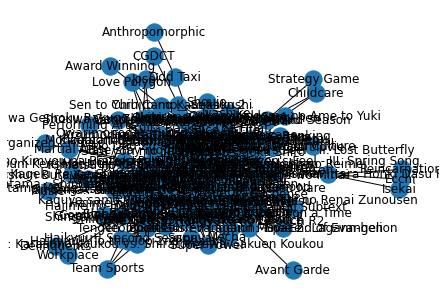

In [57]:
nx.draw(g,with_labels=True)

In [41]:
nx.write_graphml(g, "output.mal500.graphml", prettyprint=False)

In [16]:
unique_genres = {}
for i in anime_name_list:
    for j in table[i]['genres']:
        if j not in unique_genres:
            unique_genres[j] = 1
        else:
            unique_genres[j]+=1

In [24]:
unique_genres
x = {k: v for k, v in sorted(unique_genres.items(), key=lambda item: item[1],reverse=True)}

In [43]:
x

{'Drama': 200,
 'Action': 194,
 'Comedy': 186,
 'Shounen': 166,
 'Fantasy': 114,
 'Supernatural': 110,
 'Adventure': 109,
 'Slice of Life': 99,
 'Sci-Fi': 97,
 'School': 89,
 'Romance': 87,
 'Mystery': 81,
 'Historical': 77,
 'Seinen': 67,
 'Psychological': 44,
 'Adult Cast': 44,
 'Sports': 44,
 'Military': 38,
 'Iyashikei': 37,
 'Shoujo': 32,
 'Mythology': 32,
 'Suspense': 27,
 'Music': 27,
 'Mecha': 26,
 'Team Sports': 26,
 'Parody': 24,
 'Gag Humor': 23,
 'Samurai': 23,
 'Space': 21,
 'Super Power': 19,
 'Time Travel': 18,
 'Martial Arts': 18,
 'Isekai': 17,
 'Detective': 15,
 'Love Polygon': 14,
 'Gore': 13,
 'Josei': 12,
 'Survival': 10,
 'Vampire': 10,
 'Ecchi': 10,
 'Reincarnation': 10,
 'CGDCT': 10,
 'Horror': 10,
 'Strategy Game': 9,
 'Performing Arts': 9,
 'Otaku Culture': 9,
 'Mahou Shoujo': 9,
 'Childcare': 8,
 'Combat Sports': 8,
 'Romantic Subtext': 7,
 'Organized Crime': 6,
 'Visual Arts': 6,
 'Racing': 6,
 'Delinquents': 5,
 'Workplace': 5,
 'Avant Garde': 5,
 'Showbiz'

In [39]:
centrality_degree = nx.degree_centrality(g)
print("Nodes:", len(g.nodes))
print("Nodes:", len(g.edges))


Nodes: 569
Nodes: 2456


In [44]:
for u in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:69]:
    print(u, centrality_degree[u])

Drama 0.35211267605633806
Action 0.3415492957746479
Comedy 0.3274647887323944
Shounen 0.29225352112676056
Fantasy 0.2007042253521127
Supernatural 0.1936619718309859
Adventure 0.19190140845070422
Slice of Life 0.17429577464788734
Sci-Fi 0.17077464788732394
School 0.15669014084507044
Romance 0.15316901408450703
Mystery 0.1426056338028169
Historical 0.13556338028169015
Seinen 0.11795774647887325
Psychological 0.07746478873239437
Adult Cast 0.07746478873239437
Sports 0.07746478873239437
Military 0.06690140845070423
Iyashikei 0.06514084507042253
Shoujo 0.056338028169014086
Mythology 0.056338028169014086
Suspense 0.04753521126760563
Music 0.04753521126760563
Mecha 0.045774647887323945
Team Sports 0.045774647887323945
Parody 0.04225352112676056
Gag Humor 0.040492957746478875
Samurai 0.040492957746478875
Space 0.03697183098591549
Super Power 0.03345070422535212
Time Travel 0.03169014084507042
Martial Arts 0.03169014084507042
Isekai 0.029929577464788734
Detective 0.02640845070422535
Love Polygo

In [49]:
big = 0
for i in anime_name_list:
    if len(table[i]['genres'])>big:
        big=len(table[i]['genres'])
        print(i)
big

Fullmetal Alchemist: Brotherhood
Gintama°
Gintama: The Final
Kenpuu Denki Berserk


10